In [5]:
#Video https://www.youtube.com/watch?v=MSBY28IJ47U

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
## Importante e analiando o dataset

df = pd.read_csv("churnDataSet.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
365,1010-DIAUQ,Male,0,No,No,5,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),96.50,492.55,Yes
714,4312-KFRXN,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1710.9,No
602,1096-ADRUX,Female,0,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Bank transfer (automatic),74.25,4859.25,No
4582,6122-LJADA,Male,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.15,6237.05,No
584,2393-DIVAI,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.00,61.7,No


In [7]:
## Tratando o datset

df.drop('customerID', axis='columns', inplace = True) #CustomerId nao influencia no churn, apenas serve de id
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
## Por que TotalCharges eh um object e MontlhyCharges um float??
df.TotalCharges.values # Por algum motivo TotalCharges sao strings

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
#Converter TotalCharges para numeros
#pd.to_numeric(df.TotalCharges) Da erro, pois algumas posicoes possuem " " nelas

pd.to_numeric(df.TotalCharges, errors='coerce') #Ignora os espacos

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] # TotalCharges vazios

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#Eh possivel derrubar essas 11 colunas sem afetar a qualidade do dataset para o modelo 
df1 = df[df.TotalCharges != ' ']
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtype

/home/fernando/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

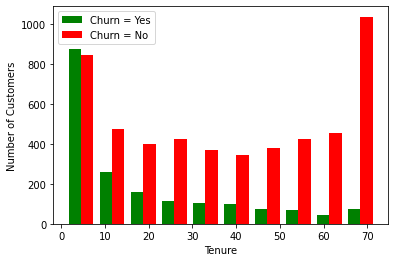

In [15]:
# Analisando os dados
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()

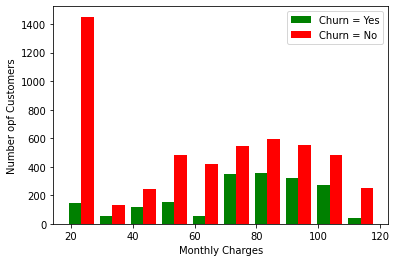

In [16]:
montlhy_charges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
montlhy_charges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([montlhy_charges_churn_yes, montlhy_charges_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number opf Customers')
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/home/fernando/.local/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
df1.replace({'Yes':1, 'No':0, 'Female':1, 'Male':0}, inplace=True)

In [22]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
# One Hot Encoding
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [25]:
# Escalar o dataset
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
df2[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [27]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [37]:
import tensorflow as tf 
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'), #Input Layer
    keras.layers.Dense(13, activation='relu'), 
    keras.layers.Dense(5, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 686us/step - loss: 0.5109 - accuracy: 0.7483
Epoch 2/100
176/176 [==============================] - 0s 714us/step - loss: 0.4296 - accuracy: 0.7956
Epoch 3/100
176/176 [==============================] - 0s 704us/step - loss: 0.4203 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 698us/step - loss: 0.4168 - accuracy: 0.8048
Epoch 5/100
176/176 [==============================] - 0s 717us/step - loss: 0.4147 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 728us/step - loss: 0.4120 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 0s 728us/step - loss: 0.4106 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 714us/step - loss: 0.4089 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 715us/step - loss: 0.4084 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 724us/step - l

176/176 [==============================] - 0s 707us/step - loss: 0.3628 - accuracy: 0.8297
Epoch 80/100
176/176 [==============================] - 0s 706us/step - loss: 0.3625 - accuracy: 0.8311
Epoch 81/100
176/176 [==============================] - 0s 722us/step - loss: 0.3611 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 0s 711us/step - loss: 0.3610 - accuracy: 0.8343
Epoch 83/100
176/176 [==============================] - 0s 713us/step - loss: 0.3606 - accuracy: 0.8304
Epoch 84/100
176/176 [==============================] - 0s 708us/step - loss: 0.3612 - accuracy: 0.8299
Epoch 85/100
176/176 [==============================] - 0s 701us/step - loss: 0.3574 - accuracy: 0.8332
Epoch 86/100
176/176 [==============================] - 0s 701us/step - loss: 0.3604 - accuracy: 0.8300
Epoch 87/100
176/176 [==============================] - 0s 694us/step - loss: 0.3613 - accuracy: 0.8316
Epoch 88/100
176/176 [==============================] - 0s 724us/step - loss:

In [38]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 585us/step - loss: 0.4910 - accuracy: 0.7662


[0.4910188615322113, 0.7661691308021545]

In [31]:
yp = model.predict(x_test)
yp[:5]

array([[0.2894097 ],
       [0.48672137],
       [0.01563421],
       [0.739259  ],
       [0.42795062]], dtype=float32)

In [32]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [33]:
y_test[:10] #&)% de acuracia

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.67      0.45      0.54       408

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.76      0.78      0.76      1407



Text(69.0, 0.5, 'Truth')

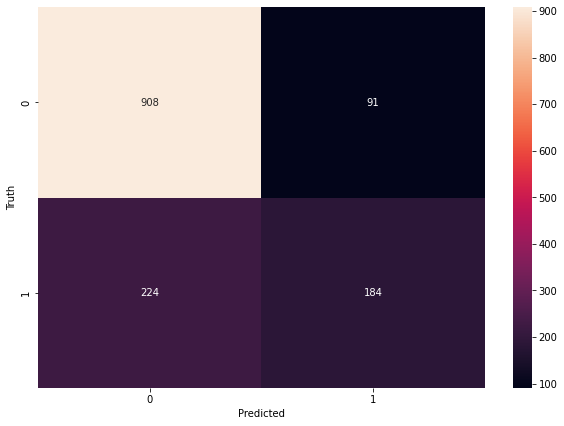

In [35]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')